In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../DataSets/HR_Analytics.csv')

In [3]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Employee Demographic:

What is distribution of Employee across different departments ,regions, education levels, genders and recruitment channels? Visualise the distribution of employees ages using histogram or KDE plot.


In [5]:
print(df.department.unique())
print(df.region.unique())
print(df.education.unique())
print(df.gender.unique())
print(df.recruitment_channel.unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
["Master's & above" "Bachelor's" nan 'Below Secondary']
['f' 'm']
['sourcing' 'other' 'referred']


In [6]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
df.previous_year_rating.mean()

3.329255780917055

In [8]:
df.education=df.education.fillna('Unknown')
df.previous_year_rating=df.previous_year_rating.fillna(3.32)

In [9]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

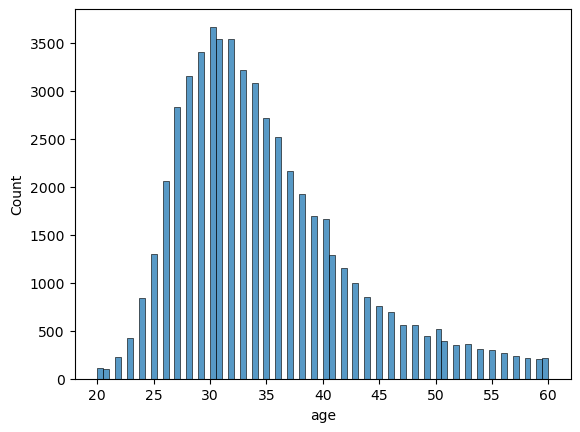

In [10]:
sb.histplot(df.age)
plt.show()

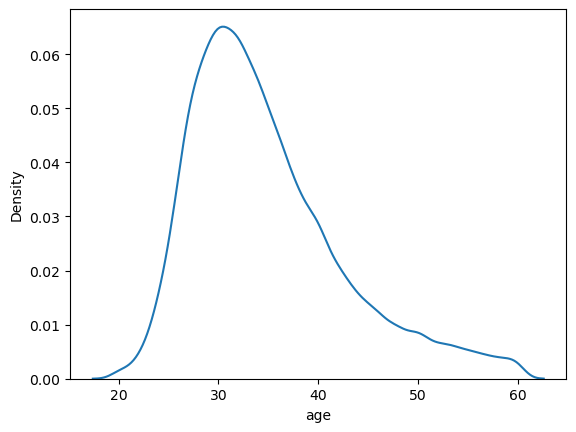

In [11]:
sb.kdeplot(df.age)
plt.show()

Employee Performance:
    
How do previous year ratings, length of services, KPIs met>80%, and awards won correlate with average training score?
Are there any differnces in average training scores between employees who were promoted and those who were not? Visualize this using box plot or violen plots?

In [12]:
l=df[['previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']]

In [13]:
l

,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,5.0,8,1,0,49
1,5.0,4,0,0,60
2,3.0,7,0,0,50
3,1.0,10,0,0,50
4,3.0,2,0,0,73
...,...,...,...,...,...
54803,3.0,17,0,0,78
54804,2.0,6,0,0,56
54805,5.0,3,1,0,79
54806,1.0,2,0,0,45


In [14]:
l.corr()

,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
previous_year_rating,1.000000,0.000895,0.338136,0.026669,0.072067
length_of_service,0.000895,1.000000,-0.077693,-0.039927,-0.038122
KPIs_met >80%,0.338136,-0.077693,1.000000,0.097000,0.078391
awards_won?,0.026669,-0.039927,0.097000,1.000000,0.072138
avg_training_score,0.072067,-0.038122,0.078391,0.072138,1.000000


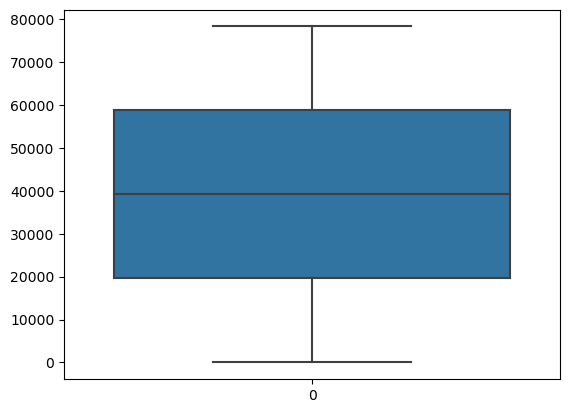

In [15]:
sb.boxplot(df.employee_id)
plt.show()

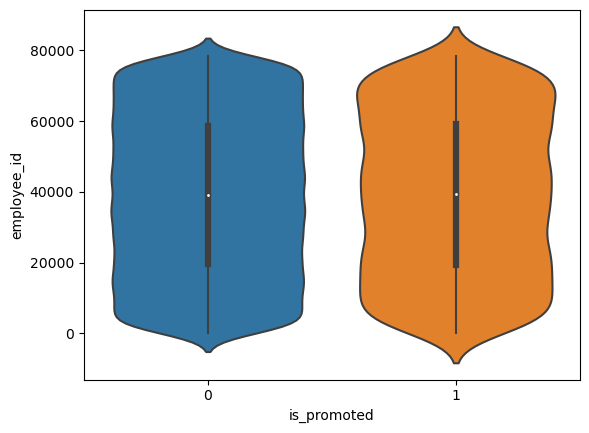

In [16]:
sb.violinplot(x='is_promoted',y='employee_id',data=df)
plt.show()

Training Analysis:

What is the distribution of number of training attended by employees? How does this vary across different departments, regions, education levels, and genders using bar plots or pie charts.

In [17]:
a=df.groupby('no_of_trainings')['employee_id'].sum()

In [18]:
a

no_of_trainings
1     1740487148
2      314521018
3       67301109
4       18277591
5        4783584
6        1822666
7         467943
8         188084
9         225057
10        170885
Name: employee_id, dtype: int64

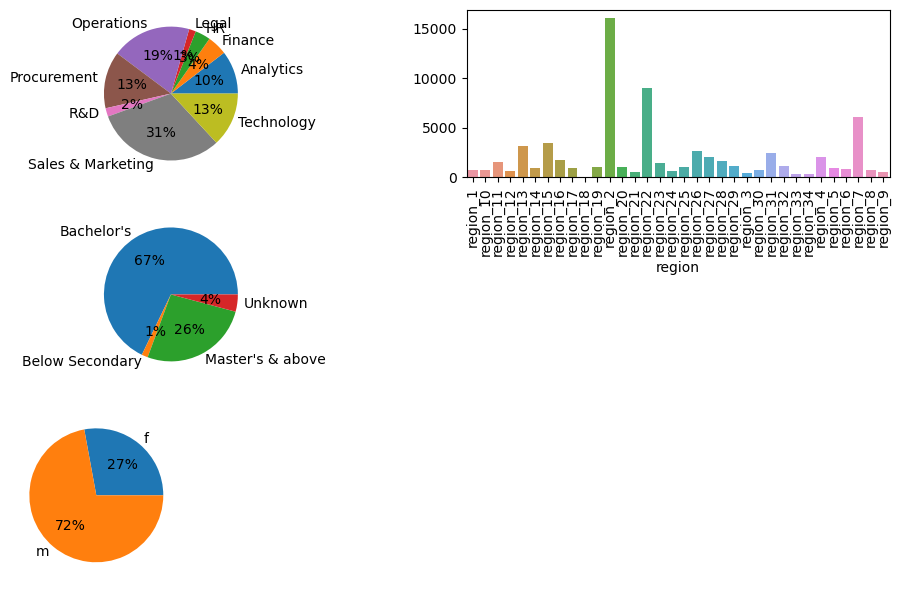

In [19]:
fig=plt.figure(figsize=(12,10))

axs1=fig.add_subplot(421)
dep=df.groupby('department')['no_of_trainings'].sum()
plt.pie(dep.values,labels=dep.index,autopct='%d%%')

ax2=fig.add_subplot(422)
reg=df.groupby('region')['no_of_trainings'].sum()
sb.barplot(x=reg.index,y=reg.values)
plt.xticks(rotation=90)

ax3=fig.add_subplot(423)
edu=df.groupby('education')['no_of_trainings'].sum()
plt.pie(edu.values,labels=edu.index,autopct='%d%%')

ax4=fig.add_subplot(437)
gen=df.groupby('gender')['no_of_trainings'].sum()
plt.pie(gen.values,labels=gen.index,autopct='%d%%')



plt.show()

Promotion Analysis:

What proportion of employees were promoted? Visualize the promotion rates across different departments, region, educational levels, and genders using barcharts or pie charts.

In [23]:
df.groupby('is_promoted')['employee_id'].count()

is_promoted
0    50140
1     4668
Name: employee_id, dtype: int64

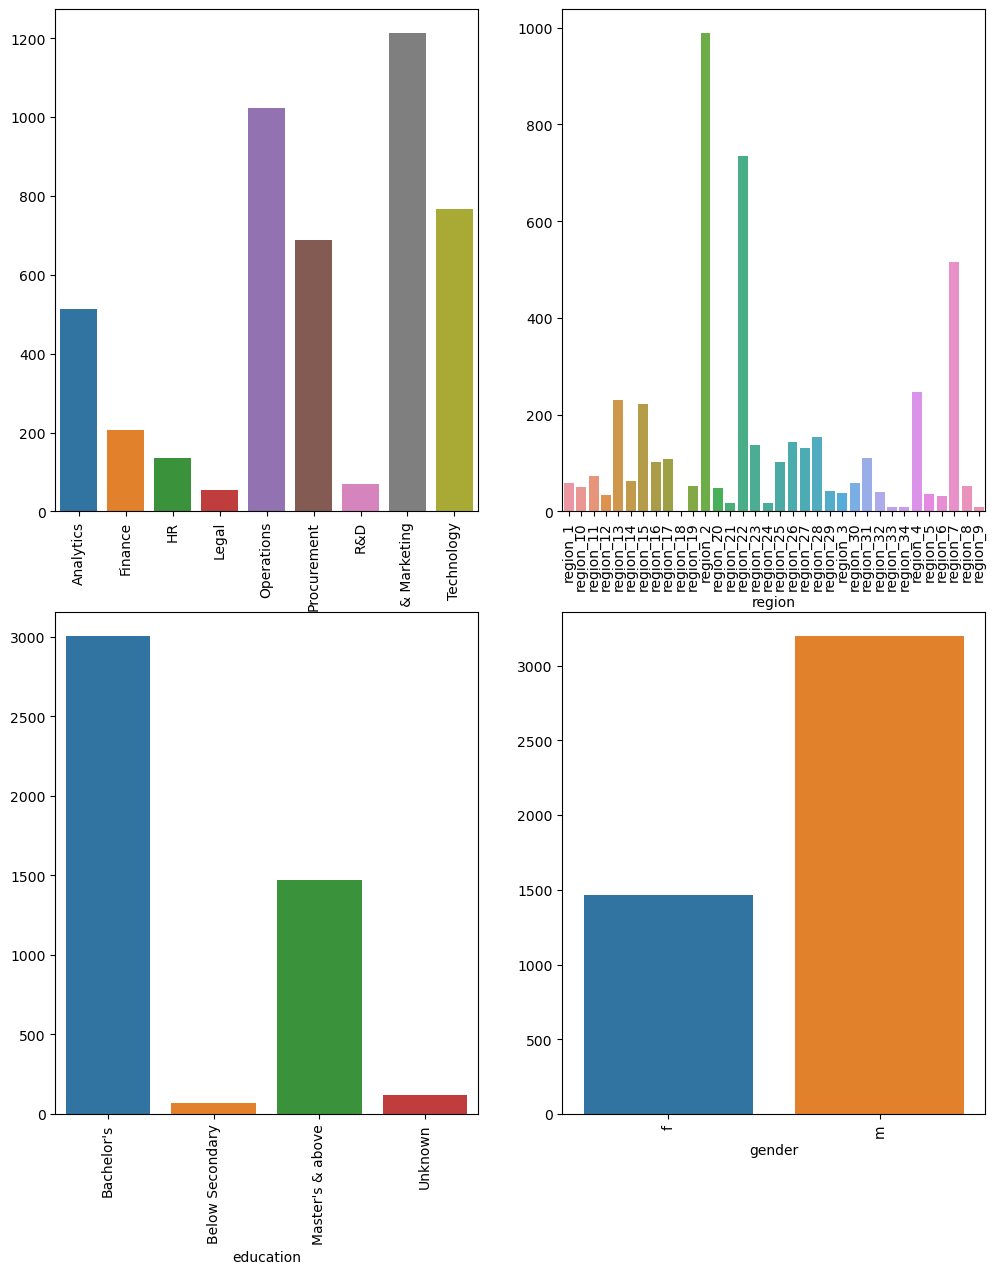

In [21]:
fig=plt.figure(figsize=(12,30))

ax1=fig.add_subplot(421)
dep=df.groupby('department')['is_promoted'].sum()
sb.barplot(x=dep.index,y=dep.values)
plt.xticks(rotation=90)

ax2=fig.add_subplot(422)
reg=df.groupby('region')['is_promoted'].sum()
sb.barplot(x=reg.index,y=reg.values)
plt.xticks(rotation=90)

ax3=fig.add_subplot(423)
edu=df.groupby('education')['is_promoted'].sum()
sb.barplot(x=edu.index,y=edu.values)
plt.xticks(rotation=90)

ax4=fig.add_subplot(424)
gen=df.groupby('gender')['is_promoted'].sum()
sb.barplot(x=gen.index,y=gen.values)
plt.xticks(rotation=90)

plt.show()

Employees Retention:

How does the length of service vary across differnt departments, region, educational levels? Visualize this using box plot or violen plots.

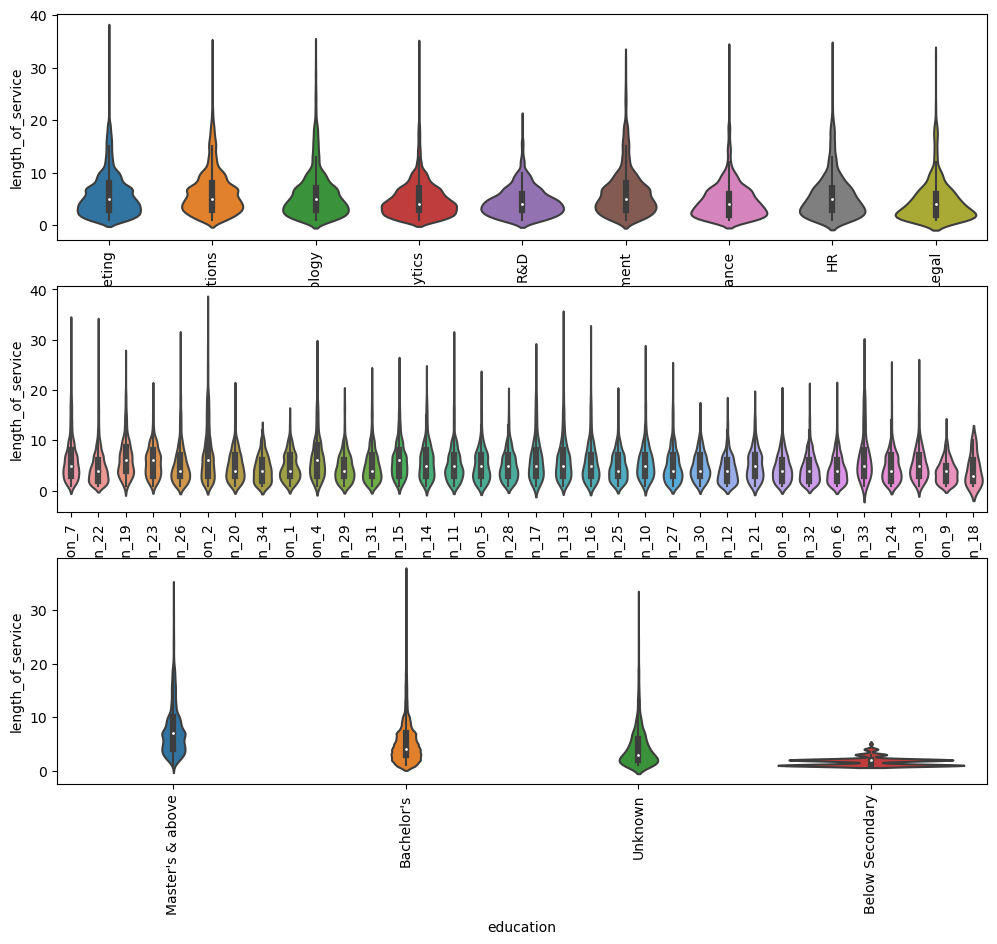

In [22]:
fig=plt.figure(figsize=(12,10))

ax1=fig.add_subplot(311)
dep=df.groupby('department')['length_of_service'].sum()
dep=dep.reset_index()
sb.violinplot(x='department',y='length_of_service',data=df)
plt.xticks(rotation=90)

ax2=fig.add_subplot(312)
reg=df.groupby('region')['length_of_service'].sum()
sb.violinplot(x='region',y='length_of_service',data=df)
plt.xticks(rotation=90)

ax3=fig.add_subplot(313)
edu=df.groupby('education')['length_of_service'].sum()
sb.violinplot(x='education',y='length_of_service',data=df)
plt.xticks(rotation=90)


plt.show()

Gender Analysis:

Is there a gender imbalance in the workforce? Visualize the distribution of genders across differnet departments and regions using count plots. Explore gender differnces in average training scores, promotion rates and length of service.

In [23]:
df.gender.value_counts()

gender
m    38496
f    16312
Name: count, dtype: int64

In [24]:
b=pd.crosstab(index=df.gender,columns=df.department,margins=True)

In [25]:
b

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,All
gender,,,,,,,,,,
f,513,681,1006,149,4677,3287,57,3154,2788,16312
m,4839,1855,1412,890,6671,3851,942,13686,4350,38496
All,5352,2536,2418,1039,11348,7138,999,16840,7138,54808


In [27]:
pd.pivot_table(data=df,index='gender',values=['avg_training_score','is_promoted','length_of_service'],aggfunc='mean')

,avg_training_score,is_promoted,length_of_service
gender,,,
f,63.889897,0.089934,5.994421
m,63.173550,0.083151,5.810889


Recruitment Channel Analysis:
    
What are the most common recruitment channels used by the company? Visualize the distribution of recuritment channels using a bar plot or pie chart.

In [28]:
df.recruitment_channel.value_counts()

recruitment_channel
other       30446
sourcing    23220
referred     1142
Name: count, dtype: int64

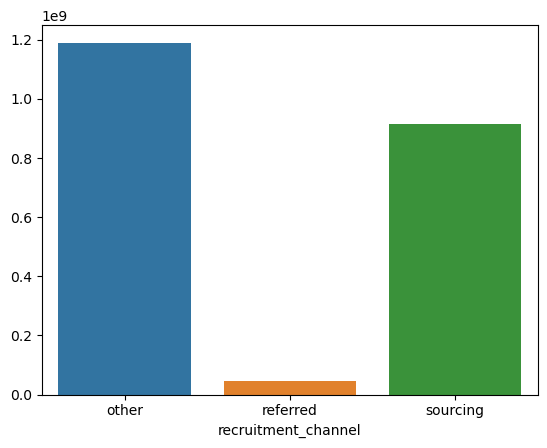

In [29]:
d=df.groupby('recruitment_channel')['employee_id'].sum()
sb.barplot(x=d.index,y=d.values)
plt.show()